In [1]:
import numpy as np
import pandas as pd
import pickle
import math
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:
DATASET = 'german'
nice_dataset = 'German'

In [3]:
# load errors 
path = f'datasets/{DATASET}/errors.p'
objects = []
with open(path, 'rb') as handle:
    file_dict = pickle.load(handle)
print(file_dict.keys())

corrected_dict = file_dict['corrected_errors']
error_dict = file_dict['actual_errors']
detected_dict = file_dict['detected_errors']

dict_keys(['actual_errors', 'corrected_errors', 'detected_errors'])


In [4]:
# load dataset info 
path = f'datasets/{DATASET}/data.p'
objects = []
with open(path, 'rb') as handle:
    data_dict = pickle.load(handle)
print(data_dict.keys())

Y = data_dict['Y']
P = data_dict['P'].astype(int)
P_val = data_dict['P_val']
priv_group = data_dict['priv_group']
pos_label = data_dict['pos_label']

dict_keys(['Y', 'P_val', 'P', 'priv_group', 'pos_label'])


In [5]:
path = f'datasets/{DATASET}/clean.csv'
clean_df = pd.read_csv(path, sep=",", header=0, dtype=float)

path = f'datasets/{DATASET}/dirty.csv'
dirty_df = pd.read_csv(path, sep=",", header=0, dtype=float)

col_cnt = clean_df.shape[1]
N = clean_df.shape[0]
print(f'row count: {N}')
print(f'column count: {col_cnt}')
print(f'cell count: {col_cnt*N}')

row count: 1000
column count: 58
cell count: 58000


## Check Detected Error Counts

In [6]:
detected_cnt = np.zeros(P.shape)
for cell in detected_dict:
    val = detected_dict[cell]
    if val == '': val='nan'
    # dirty_df.iloc[cell] = float(val)
    detected_cnt[cell[0]] += 1

    # print(cell[0])
total = detected_cnt.sum()
print(f'total detections: {total}')

total detections: 2217.0


In [7]:
# count corrections by priv
priv_det_cnt = detected_cnt[P==priv_group].sum()
print(f'detections made on priv group: {priv_det_cnt}')

unpriv_det_cnt = detected_cnt[P!=priv_group].sum()
print(f'detections made on unpriv group: {unpriv_det_cnt}')

detections made on priv group: 1469.0
detections made on unpriv group: 748.0


In [8]:
priv_det_m_cnt = (detected_cnt[P==priv_group] > 0).sum()
print(f'detected members of priv group: {priv_det_m_cnt} out of {(P==priv_group).sum()}, {priv_det_m_cnt/(P==priv_group).sum()*100:.1f}% ({priv_det_cnt/priv_det_m_cnt:.2f} corrections per corrected member)')

unpriv_det_m_cnt = (detected_cnt[P!=priv_group] > 0).sum()
print(f'detected members of unpriv group: {unpriv_det_m_cnt} out of {(P!=priv_group).sum()}, {unpriv_det_m_cnt/(P!=priv_group).sum()*100:.1f}% ({unpriv_det_cnt/unpriv_det_m_cnt:.2f} corrections per corrected member)')

detected members of priv group: 633 out of 690, 91.7% (2.32 corrections per corrected member)
detected members of unpriv group: 296 out of 310, 95.5% (2.53 corrections per corrected member)


## Check Corrected Error Counts

In [9]:
corrected_cnt = np.zeros(P.shape)
for cell in corrected_dict:
    val = corrected_dict[cell]
    if val == '': val='nan'
    # dirty_df.iloc[cell] = float(val)
    corrected_cnt[cell[0]] += 1

    # print(cell[0])
total = corrected_cnt.sum()
print(f'total corrections: {total}')

total corrections: 1867.0


In [10]:
# count corrections by priv
priv_corr_cnt = corrected_cnt[P==priv_group].sum()
print(f'corrections made on priv group: {priv_corr_cnt}')

unpriv_corr_cnt = corrected_cnt[P!=priv_group].sum()
print(f'corrections made on unpriv group: {unpriv_corr_cnt}')

corrections made on priv group: 1195.0
corrections made on unpriv group: 672.0


In [11]:
priv_corr_m_cnt = (corrected_cnt[P==priv_group] > 0).sum()
print(f'corr members of priv group: {priv_corr_m_cnt} out of {(P==priv_group).sum()}, {priv_corr_m_cnt/(P==priv_group).sum()*100:.1f}% ({priv_corr_cnt/priv_corr_m_cnt:.2f} corrections per corrected member)')

unpriv_corr_m_cnt = (corrected_cnt[P!=priv_group] > 0).sum()
print(f'corr members of unpriv group: {unpriv_corr_m_cnt} out of {(P!=priv_group).sum()}, {unpriv_corr_m_cnt/(P!=priv_group).sum()*100:.1f}% ({unpriv_corr_cnt/unpriv_corr_m_cnt:.2f} corrections per corrected member)')

corr members of priv group: 580 out of 690, 84.1% (2.06 corrections per corrected member)
corr members of unpriv group: 285 out of 310, 91.9% (2.36 corrections per corrected member)


## Check Actual Error Counts

In [12]:
error_cnt = np.zeros(P.shape)
for cell in error_dict:
    error_cnt[cell[0]] += 1

total = error_cnt.sum()
print(f'total errors: {total}')

total errors: 4703.0


In [13]:
# count corrections by priv
priv_err_cnt = error_cnt[P==priv_group].sum()
print(f'errors detected on priv group: {priv_err_cnt}')

unpriv_err_cnt = error_cnt[P!=priv_group].sum()
print(f'errors detected on unpriv group: {unpriv_err_cnt}')

errors detected on priv group: 3197.0
errors detected on unpriv group: 1506.0


In [14]:
priv_err_m_cnt = (error_cnt[P==priv_group] > 0).sum()
print(f'error members of priv group: {priv_err_m_cnt} out of {(P==priv_group).sum()}, {priv_err_m_cnt/(P==priv_group).sum()*100:.1f}% ({priv_err_cnt/priv_err_m_cnt:.2f} errors per incorrect member)')

unpriv_err_m_cnt = (error_cnt[P!=priv_group] > 0).sum()
print(f'error members of unpriv group: {unpriv_err_m_cnt} out of {(P!=priv_group).sum()}, {unpriv_err_m_cnt/(P!=priv_group).sum()*100:.1f}% ({unpriv_err_cnt/unpriv_err_m_cnt:.2f} erros per incorrect member)')

error members of priv group: 686 out of 690, 99.4% (4.66 errors per incorrect member)
error members of unpriv group: 309 out of 310, 99.7% (4.87 erros per incorrect member)


## Investigate Detection

In [15]:
i_prot = np.arange(P.shape[0])[P==priv_group]
i_unprot = np.arange(P.shape[0])[P!=priv_group]

totals_by_prot = np.zeros(2)
totals_by_prot[0] = (P==0).sum() * col_cnt
totals_by_prot[1] = (P==1).sum() * col_cnt
totals_by_prot

array([17980., 40020.])

In [16]:
det_vals = np.zeros(2)
det_vals_errors = np.zeros(2)
# det_vals_correct = np.zeros(2)

tp= np.zeros(2)
fp = np.zeros(2)

for cell in detected_dict:
    i = cell[0]
    p_val = P[i]
    det_vals[p_val] +=1
    if cell in error_dict:
        det_vals_errors[p_val] +=1
        tp[p_val] += 1
    else: fp[p_val] += 1

        # if detected_dict[cell] == error_dict[cell]:
        #     cor_vals_correct[p_val] +=1

print(det_vals)
print(det_vals_errors)

[ 748. 1469.]
[138. 367.]


In [17]:
err_vals = np.zeros(2)
err_vals_detected = np.zeros(2)

fn = np.zeros(2)
tn = np.zeros(2)
# err_vals_corrected_correctly = np.zeros(2)

for cell in error_dict:
    i = cell[0]
    p_val = P[i]
    err_vals[p_val] +=1
    if cell in detected_dict:
        err_vals_detected[p_val] +=1
    else: fn[p_val] +=1

        # if corrected_dict[cell] == error_dict[cell]:
        #     err_vals_corrected_correctly[p_val] +=1

tn = totals_by_prot - tp - fp - fn
print(err_vals)
print(err_vals_detected)
# print(err_vals_corrected_correctly)

[1506. 3197.]
[138. 367.]


In [18]:
group = priv_group
n_group = (P==group).sum()
group_vals = n_group*col_cnt
print(f'Priv Group')
print(f'\tActual Errors: {err_vals[group]:.0f} ({err_vals[group]/group_vals*100:.0f}%)')
print(f'\tActual Errors identified as incorrect: {err_vals_detected[group]:.0f} ({err_vals_detected[group]/err_vals[group]*100:.1f}% of actual errors)')
print(f'\tDetected Errors: {det_vals[group]:.0f} ({det_vals[group]/group_vals*100:.0f}%)')
print(f'\tDetected Errors Actually incorrect: {det_vals_errors[group]:.0f} ({det_vals_errors[group]/det_vals[group]*100:.1f}% of detected errors)')

print(f'\ttp: {tp[group]:.0f}')
print(f'\tfp: {fp[group]:.0f}')
print(f'\ttn: {tn[group]:.0f}')
print(f'\tfn: {fn[group]:.0f}')
print(f'\ttotal: {totals_by_prot[group]:.0f}')

acc = (tp[group] + tn[group]) / totals_by_prot[group]
print(f'\taccuracy: {acc}')

Priv Group
	Actual Errors: 3197 (8%)
	Actual Errors identified as incorrect: 367 (11.5% of actual errors)
	Detected Errors: 1469 (4%)
	Detected Errors Actually incorrect: 367 (25.0% of detected errors)
	tp: 367
	fp: 1102
	tn: 35721
	fn: 2830
	total: 40020
	accuracy: 0.9017491254372814


In [19]:
group = abs(priv_group-1)
n_group = (P==group).sum()
group_vals = n_group*col_cnt
print(f'Priv Group')
print(f'\tActual Errors: {err_vals[group]:.0f} ({err_vals[group]/group_vals*100:.0f}%)')
print(f'\tActual Errors identified as incorrect: {err_vals_detected[group]:.0f} ({err_vals_detected[group]/err_vals[group]*100:.1f}% of actual errors)')
print(f'\tDetected Errors: {det_vals[group]:.0f} ({det_vals[group]/group_vals*100:.0f}%)')
print(f'\tDetected Errors Actually incorrect: {det_vals_errors[group]:.0f} ({det_vals_errors[group]/det_vals[group]*100:.1f}% of detected errors)')

print(f'\ttp: {tp[group]:.0f}')
print(f'\tfp: {fp[group]:.0f}')
print(f'\ttn: {tn[group]:.0f}')
print(f'\tfn: {fn[group]:.0f}')
print(f'\ttotal: {totals_by_prot[group]:.0f}')
acc = (tp[group] + tn[group]) / totals_by_prot[group]
print(f'\taccuracy: {acc}')

Priv Group
	Actual Errors: 1506 (8%)
	Actual Errors identified as incorrect: 138 (9.2% of actual errors)
	Detected Errors: 748 (4%)
	Detected Errors Actually incorrect: 138 (18.4% of detected errors)
	tp: 138
	fp: 610
	tn: 15864
	fn: 1368
	total: 17980
	accuracy: 0.8899888765294772


In [20]:
print(f'tp: {tp.sum()}')
print(f'fp: {fp.sum()}')
print(f'tn: {tn.sum()}')
print(f'fn: {fn.sum()}')
print(f'totals: {totals_by_prot.sum()}')

acc = (tp.sum() + tn.sum()) / totals_by_prot.sum()
print(f'accuracy: {acc}')

tprDiff = (tp[0]/(tp[0]+fn[0])) - (tp[1]/(tp[1]+fn[1]))
fprDiff = (fp[0]/(fp[0]+tn[0])) - (fp[1]/(fp[1]+tn[1]))
eo = .5*(abs(tprDiff)+abs(fprDiff))
print(f'equalized odds: {eo}')

tp: 505.0
fp: 1712.0
tn: 51585.0
fn: 4198.0
totals: 58000.0
accuracy: 0.8981034482758621
equalized odds: 0.01513137532463424


## Investigate Correction

In [21]:
i_prot = np.arange(P.shape[0])[P==priv_group]
i_unprot = np.arange(P.shape[0])[P!=priv_group]


In [22]:
cor_vals = np.zeros(2)
cor_vals_errors = np.zeros(2)
cor_vals_correct = np.zeros(2)

actual = []
dirty = []
pred = []
prot_mask = []

for cell in corrected_dict:
    i = cell[0]
    p_val = P[i]
    cor_vals[p_val] +=1

    # get rmse for all corrected 
    clean_value = float('nan') if clean_df.iloc[cell]=='' else float(clean_df.iloc[cell])
    dirty_value = float('nan') if dirty_df.iloc[cell]=='' else float(dirty_df.iloc[cell])
    corrected_value = float('nan') if corrected_dict[cell]=='' else float(corrected_dict[cell])

    actual.append(clean_value)
    dirty.append(dirty_value)
    pred.append(corrected_value)
    prot_mask.append(p_val)
    if cell in detected_dict:
        cor_vals_errors[p_val] +=1

        # if corrected_dict[cell] == error_dict[cell]:
        #     cor_vals_correct[p_val] +=1
        # print(corrected_dict[cell], clean_df.iloc[cell])
        if corrected_value == clean_value:
            # print(corrected_dict[cell], clean_df.iloc[cell])
            # print('yes')
            cor_vals_correct[p_val] +=1

actual = [0 if math.isnan(x) else x for x in actual]
dirty = [0 if math.isnan(x) else x for x in dirty]
pred = [0 if math.isnan(x) else x for x in pred]

print(cor_vals)
print(cor_vals_errors)
print(cor_vals_correct)
print(f'rmse dirty: {mean_squared_error(actual, dirty, squared = False)}')
print(f'rmse corrected: {mean_squared_error(actual, pred, squared = False)}')

print('protected')
mask = np.array(prot_mask)!=priv_group
prot_dirty_rmse = mean_squared_error(np.array(actual)[mask], np.array(dirty)[mask], squared = False)
print(f'rmse dirty: {prot_dirty_rmse}')
prot_corr_rmse = mean_squared_error(np.array(actual)[mask], np.array(pred)[mask], squared = False)
print(f'rmse corrected: {prot_corr_rmse}')

print('unprotected')
mask = np.array(prot_mask)==priv_group
unprot_dirty_rmse = mean_squared_error(np.array(actual)[mask], np.array(dirty)[mask], squared = False)
print(f'rmse dirty: {unprot_dirty_rmse}')
unprot_corr_rmse = mean_squared_error(np.array(actual)[mask], np.array(pred)[mask], squared = False)
print(f'rmse corrected: {unprot_corr_rmse}')

[ 672. 1195.]
[ 636. 1161.]
[114. 292.]
rmse dirty: 482.0735074975172
rmse corrected: 1023.4403272171746
protected
rmse dirty: 407.57765656492063
rmse corrected: 1071.847762044592
unprotected
rmse dirty: 519.2921485684658
rmse corrected: 995.1849259409448


In [23]:
cor_vals = np.zeros(2)
cor_vals_errors = np.zeros(2)
cor_vals_correct = np.zeros(2)

actual = []
dirty = []
pred = []
prot_mask = []

for cell in corrected_dict:
    i = cell[0]
    p_val = P[i]
    cor_vals[p_val] +=1
    if cell in error_dict: # if corrected and actual error
        cor_vals_errors[p_val] +=1

        # if corrected_dict[cell] == error_dict[cell]:
        #     cor_vals_correct[p_val] +=1
        # print(corrected_dict[cell], clean_df.iloc[cell])
        clean_value = float('nan') if clean_df.iloc[cell]=='' else float(clean_df.iloc[cell])
        dirty_value = float('nan') if dirty_df.iloc[cell]=='' else float(dirty_df.iloc[cell])
        corrected_value = float('nan') if corrected_dict[cell]=='' else float(corrected_dict[cell])

        actual.append(clean_value)
        dirty.append(dirty_value)
        pred.append(corrected_value)
        prot_mask.append(p_val)
        if corrected_value == clean_value:
            # print(corrected_dict[cell], clean_df.iloc[cell])
            # print('yes')
            cor_vals_correct[p_val] +=1

actual = [0 if math.isnan(x) else x for x in actual]
dirty = [0 if math.isnan(x) else x for x in dirty]
pred = [0 if math.isnan(x) else x for x in pred]

print(cor_vals)
print(cor_vals_errors)
print(cor_vals_correct)
print(f'rmse dirty: {mean_squared_error(actual, dirty, squared = False)}')
print(f'rmse corrected: {mean_squared_error(actual, pred, squared = False)}')

print('protected')
mask = np.array(prot_mask)!=priv_group
prot_dirty_rmse = mean_squared_error(np.array(actual)[mask], np.array(dirty)[mask], squared = False)
print(f'rmse dirty: {prot_dirty_rmse}')
prot_corr_rmse = mean_squared_error(np.array(actual)[mask], np.array(pred)[mask], squared = False)
print(f'rmse corrected: {prot_corr_rmse}')

print('unprotected')
mask = np.array(prot_mask)==priv_group
unprot_dirty_rmse = mean_squared_error(np.array(actual)[mask], np.array(dirty)[mask], squared = False)
print(f'rmse dirty: {unprot_dirty_rmse}')
unprot_corr_rmse = mean_squared_error(np.array(actual)[mask], np.array(pred)[mask], squared = False)
print(f'rmse corrected: {unprot_corr_rmse}')

[ 672. 1195.]
[138. 324.]
[105. 258.]
rmse dirty: 969.0907239102185
rmse corrected: 1050.019923538044
protected
rmse dirty: 899.4053389702086
rmse corrected: 829.028635368447
unprotected
rmse dirty: 997.2939946316708
rmse corrected: 1131.1096376327448


In [24]:
np.array(actual)[np.array(prot_mask)==priv_group]
# prot_mask

array([7.308e+03, 6.187e+03, 7.090e+02, 1.495e+03, 6.850e+02, 7.270e+02,
       1.484e+03, 1.309e+03, 2.384e+03, 4.380e+03, 6.681e+03, 2.169e+03,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 4.900e+01, 3.100e+01, 5.500e+01, 4.500e+01, 3.900e+01,
       4.100e+01, 3.200e+01, 3.100e+01, 2.000e+00, 

In [25]:
err_vals = np.zeros(2)
err_vals_corrected = np.zeros(2)
err_vals_corrected_correctly = np.zeros(2)

for cell in detected_dict:
    i = cell[0]
    p_val = P[i]
    err_vals[p_val] +=1
    if cell in corrected_dict:
        err_vals_corrected[p_val] +=1

        clean_value = float('nan') if clean_df.iloc[cell]=='' else float(clean_df.iloc[cell])
        corrected_value = float('nan') if corrected_dict[cell]=='' else float(corrected_dict[cell])

        if corrected_value == clean_value:
            err_vals_corrected_correctly[p_val] +=1
            
print(err_vals)
print(err_vals_corrected)
print(err_vals_corrected_correctly)

[ 748. 1469.]
[ 636. 1161.]
[114. 292.]


In [26]:
group = priv_group
n_group = (P==group).sum()
group_vals = n_group*col_cnt
print(f'Unprotected Group')
print(f'\tActual Errors: {err_vals[group]:.0f} ({err_vals[group]/group_vals*100:.0f}%)')
print(f'\tActual Errors identified as incorrect: {err_vals_corrected[group]:.0f} ({err_vals_corrected[group]/err_vals[group]*100:.1f}% of actual errors)')
print(f'\tCorrected Correctly: {err_vals_corrected_correctly[group]:.0f}')
print(f'\t\t({err_vals_corrected_correctly[group]/err_vals[group]*100:.1f}% of actual errors)')
print(f'\t\t({err_vals_corrected_correctly[group]/err_vals_corrected[group]*100:.1f}% of corrected errors)')

Unprotected Group
	Actual Errors: 1469 (4%)
	Actual Errors identified as incorrect: 1161 (79.0% of actual errors)
	Corrected Correctly: 292
		(19.9% of actual errors)
		(25.2% of corrected errors)


In [27]:
group = abs(priv_group-1)
n_group = (P==group).sum()
group_vals = n_group*col_cnt
print(f'Protected Group')
print(f'\tActual Errors: {err_vals[group]:.0f} ({err_vals[group]/group_vals*100:.0f}%)')
print(f'\tActual Errors identified as incorrect: {err_vals_corrected[group]:.0f} ({err_vals_corrected[group]/err_vals[group]*100:.1f}% of actual errors)')
print(f'\tCorrected Correctly: {err_vals_corrected_correctly[group]:.0f}')
print(f'\t\t({err_vals_corrected_correctly[group]/err_vals[group]*100:.1f}% of actual errors)')
print(f'\t\t({err_vals_corrected_correctly[group]/err_vals_corrected[group]*100:.1f}% of corrected errors)')

Protected Group
	Actual Errors: 748 (4%)
	Actual Errors identified as incorrect: 636 (85.0% of actual errors)
	Corrected Correctly: 114
		(15.2% of actual errors)
		(17.9% of corrected errors)


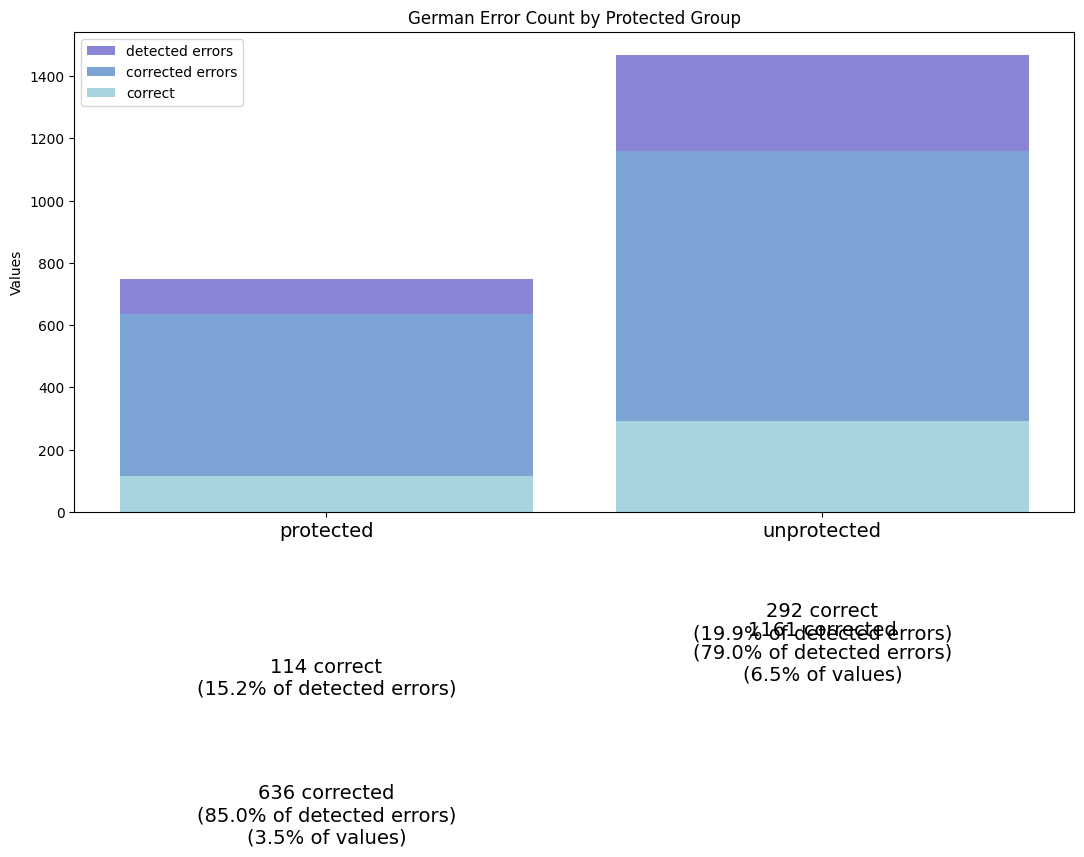

In [28]:
err_vals
x_labels =['protected','protected']
x_labels[priv_group] = 'unprotected'

# ind = np.arange(2) # the x locations for the groups
width = 0.5
ind = [0,0.1+width] # the x locations for the groups
fig = plt.figure()
fig.set_figwidth(10)

c = ['#8885d7','#676767','#47637d']
c = ['#8885d7','#7ba4d4','#a8d4df']

ax = fig.add_axes([0,0,1,1])
ax.bar(ind, err_vals, width, color=c[0])
ax.bar(ind, err_vals_corrected, width,bottom=0, color=c[1], label='test')
ax.bar(ind, err_vals_corrected_correctly, width,bottom=0, color=c[2])

# top labels
# y_offset = 500
# y_offset = -3500 # compas
# y_offset = -60 # german
y_offset = -1000 # adult

#  actual error labels
# for i in np.arange(2):
#     n_group = (P==i).sum()
#     group_vals = n_group*col_cnt
#     total = err_vals[i]
#     label = f'{total:.0f} detected \n({total/group_vals*100:.1f}% of values)'
#     ax.text(ind[i], total + y_offset, label, ha='center', color='black',fontsize=14)

# corrected error labels
y_offset = -1700 # adult
for i in np.arange(2):
    n_group = (P==i).sum()
    errors = err_vals[i]
    total = err_vals_corrected[i]
    label = f'{total:.0f} corrected\n({total/errors*100:.1f}% of detected errors)'
    label = f'{total:.0f} corrected\n({total/errors*100:.1f}% of detected errors)\n({total/group_vals*100:.1f}% of values)' # adult 
    ax.text(ind[i], total + y_offset, label, ha='center', color='black',fontsize=14)

# correctly corrected error labels
y_offset = -700 # adult
for i in np.arange(2):
    n_group = (P==i).sum()
    errors = err_vals[i]
    corrected = err_vals_corrected[i]
    total = err_vals_corrected_correctly[i]
    # label = f'{total:.0f}\n({total/errors*100:.1f}% of detected errors)\n({total/corrected*100:.1f}% of corrected errors)'
    label = f'{total:.0f} correct\n({total/errors*100:.1f}% of detected errors)'
    ax.text(ind[i], total + y_offset, label, ha='center',color='black',fontsize=14)

ax.set_ylabel('Values')
ax.set_title(f'{nice_dataset} Error Count by Protected Group')
ax.set_xticks(ind, x_labels,fontsize=14)
# ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['detected errors', 'corrected errors', 'correct'])



plt.show()